# <center> MAT 616 Spring 2023

# <center> Final Part 1: Exploring Distance in the Real World


---



---
## <center> <font color=green> BY Vipul Arora
###<center><font color=green> May 16,2023


In [2]:
from google. colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <center> 3. Real-world application 
##A recommendation system is a tool that uses a series of algorithms, data analysis and artificial Intelligence (AI) to make recommendations online.
##Use the file cosmetics.csv provided to create a recommendation system as follows:

##• Define the “purchasing needs and taste” distance (pnt-D) between each two customers. The metric pnt-D is entirely to be defined by the student doing this project. A heuristic justification is required for the choice of pnt-D.
##• Based on heuristic reasoning (which needs to be explained) gathered from pnt-D data, for each customer, provide predictions of what the customer has not bought yet, and will want to buy next.

#<center><font color=green>ANSWER
code below

In [3]:
# STEP 1. Loading the cosmetics data and liberaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

path='/content/drive/MyDrive/Cosmetics.csv'
data=pd.read_csv(path)

In [4]:
data.head()

,Trans.,Bag,Blush,Nail Polish,Brushes,Concealer,Eyebrow Pencils,Bronzer,Lip liner,Mascara,Eye shadow,Foundation,Lip Gloss,Lipstick,Eyeliner
0,1,0,1,1,1,1,0,1,1,1,0,0,0,0,1
1,2,0,0,1,0,1,0,1,1,0,0,1,1,0,0
2,3,0,1,0,0,1,1,1,1,1,1,1,1,1,0
3,4,0,0,1,1,1,0,1,0,0,0,1,0,0,1
4,5,0,1,0,0,1,0,1,1,1,1,0,1,1,0


In [5]:
data.columns

Index(['Trans. ', 'Bag', 'Blush', 'Nail Polish', 'Brushes', 'Concealer',
       'Eyebrow Pencils', 'Bronzer', 'Lip liner', 'Mascara', 'Eye shadow',
       'Foundation', 'Lip Gloss', 'Lipstick', 'Eyeliner'],
      dtype='object')

In [6]:
#only using the data for 100 customers we can always change according to our needs and requirements
#data = data.iloc[:100, :]

In [7]:
#  Calculate the distance between two customers
def dist(c1,c2):
  return abs(c1 - c2).sum()

In [8]:
# STEP 2. Calculate the purchasing needs and taste distance (pnt-D) for all the data 
def calculate_pnt_d(data):
    pnt_d = data.apply(lambda x: x.sum() / len(x), axis=1)
    return pnt_d

In [9]:
calculate_pnt_d(data)

0       0.600000
1       0.533333
2       0.866667
3       0.666667
4       0.866667
         ...    
995    66.400000
996    66.600000
997    67.066667
998    67.066667
999    67.000000
Length: 1000, dtype: float64

In [10]:
# STEP 3 .Calculate the similarity between customers
def calculate_similarity(data):
    similarity_matrix = cosine_similarity(data)
    similarity_df = pd.DataFrame(similarity_matrix, index=data.index, columns=data.index)
    return similarity_df

In [11]:
calculate_similarity(data)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.632456,0.611775,0.639602,0.580259,0.432590,0.607548,0.478091,0.363696,0.453267,...,0.334342,0.333669,0.333333,0.334674,0.334003,0.333333,0.333333,0.335336,0.334667,0.334666
1,0.632456,1.000000,0.798024,0.809040,0.770675,0.666886,0.823387,0.718132,0.690066,0.645010,...,0.632773,0.632455,0.632455,0.633408,0.633090,0.632456,0.633089,0.633720,0.632770,0.633403
2,0.611775,0.798024,1.000000,0.733674,0.918532,0.707107,0.866154,0.767772,0.750939,0.735333,...,0.688708,0.688478,0.688478,0.689399,0.689398,0.688247,0.688707,0.689394,0.689393,0.689163
3,0.639602,0.809040,0.733674,1.000000,0.816497,0.899229,0.915960,0.891883,0.883960,0.869731,...,0.853231,0.853017,0.852802,0.853444,0.853015,0.852803,0.853016,0.853868,0.853227,0.853440
4,0.580259,0.770675,0.918532,0.816497,1.000000,0.875413,0.951845,0.915475,0.892691,0.896120,...,0.870737,0.870563,0.870563,0.871086,0.871086,0.870388,0.870562,0.871082,0.871256,0.871082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.333333,0.632456,0.688247,0.852803,0.870388,0.973329,0.911322,0.956183,0.981981,0.971286,...,0.999997,0.999999,0.999999,0.999997,0.999997,1.000000,0.999999,0.999996,0.999996,0.999998
996,0.333333,0.633089,0.688707,0.853016,0.870562,0.973328,0.911583,0.956302,0.982089,0.971285,...,0.999996,0.999998,0.999998,0.999997,0.999998,0.999999,1.000000,0.999996,0.999995,0.999996
997,0.335336,0.633720,0.689394,0.853868,0.871082,0.973650,0.912101,0.956419,0.982305,0.971574,...,0.999995,0.999997,0.999996,0.999997,0.999995,0.999996,0.999996,1.000000,0.999996,0.999996
998,0.334667,0.632770,0.689393,0.853227,0.871256,0.973650,0.911840,0.956419,0.982195,0.971671,...,0.999998,0.999997,0.999997,0.999997,0.999997,0.999996,0.999995,0.999996,1.000000,0.999997


In [12]:
# STEP 4. Get recommendations for a given customer
def get_recommendations(customer_id, similarity_df, data, pnt_d):
    customer_products = data.loc[customer_id] 
    similar_customers = similarity_df[customer_id].sort_values(ascending=False)[1:]              #sorting descending order as per the score/distance
    similar_customers_products = data.loc[similar_customers.index]                               #indexing as per the rows ie customers
    recommendations = similar_customers_products.mul(pnt_d, axis=0).sum().div(pnt_d.sum())       #total weighted ratings- product ratings * purchasing needs and taste distance (pnt-D) divided by the sum of pnt-D values to normalize the recommendations
    recommendations = recommendations.where((customer_products == 0) & (recommendations > 0.32)) #applying threshold and excluding the purchased products. we can adjust the thrashhold accordingly.
    recommended_items = recommendations[recommendations.notnull()].index                         #Finally, the indices of the recommended items
    return recommended_items

In [13]:
# STEP 5. Executing all the functions and calculating all the recommendations for all the customers 
# Create a matrix of product ratings (0 or 1)
product_ratings = data.drop('Trans. ', axis=1)

# Calculate the similarity between customers
similarity_df = calculate_similarity(product_ratings)

# Create a new column for recommendations
data['Recommendation'] = ''

# Calculate the purchasing needs and taste distance (pnt-D)
pnt_d = similarity_df.apply(lambda row: dist(row, similarity_df.loc[:, similarity_df.columns != row.name].mean()), axis=1)


# Print recommendations for all customers
for customer_id in product_ratings.index:
    recommendations = get_recommendations(customer_id, similarity_df, product_ratings, pnt_d)
    if len(recommendations) > 0:
        data.at[customer_id, 'Recommendation'] = ', '.join(recommendations)

# Print the updated DataFrame with the recommendation column
data.head(10)

,Trans.,Bag,Blush,Nail Polish,Brushes,Concealer,Eyebrow Pencils,Bronzer,Lip liner,Mascara,Eye shadow,Foundation,Lip Gloss,Lipstick,Eyeliner,Recommendation
0,1,0,1,1,1,1,0,1,1,1,0,0,0,0,1,"Eye shadow, Foundation, Lip Gloss"
1,2,0,0,1,0,1,0,1,1,0,0,1,1,0,0,"Blush, Mascara, Eye shadow, Eyeliner"
2,3,0,1,0,0,1,1,1,1,1,1,1,1,1,0,Eyeliner
3,4,0,0,1,1,1,0,1,0,0,0,1,0,0,1,"Blush, Mascara, Eye shadow, Lip Gloss"
4,5,0,1,0,0,1,0,1,1,1,1,0,1,1,0,"Foundation, Eyeliner"
5,6,0,0,0,0,1,0,0,0,0,0,0,0,0,1,"Blush, Mascara, Eye shadow, Foundation, Lip Gloss"
6,7,0,1,1,1,1,0,1,1,1,1,1,1,0,0,Eyeliner
7,8,0,0,1,1,0,0,1,0,1,1,0,1,0,0,"Blush, Concealer, Foundation, Eyeliner"
8,9,0,0,0,0,1,0,0,0,0,0,1,0,1,0,"Blush, Mascara, Eye shadow, Lip Gloss, Eyeliner"
9,10,1,1,1,1,0,0,0,0,1,1,0,0,0,0,"Concealer, Foundation, Lip Gloss, Eyeliner"


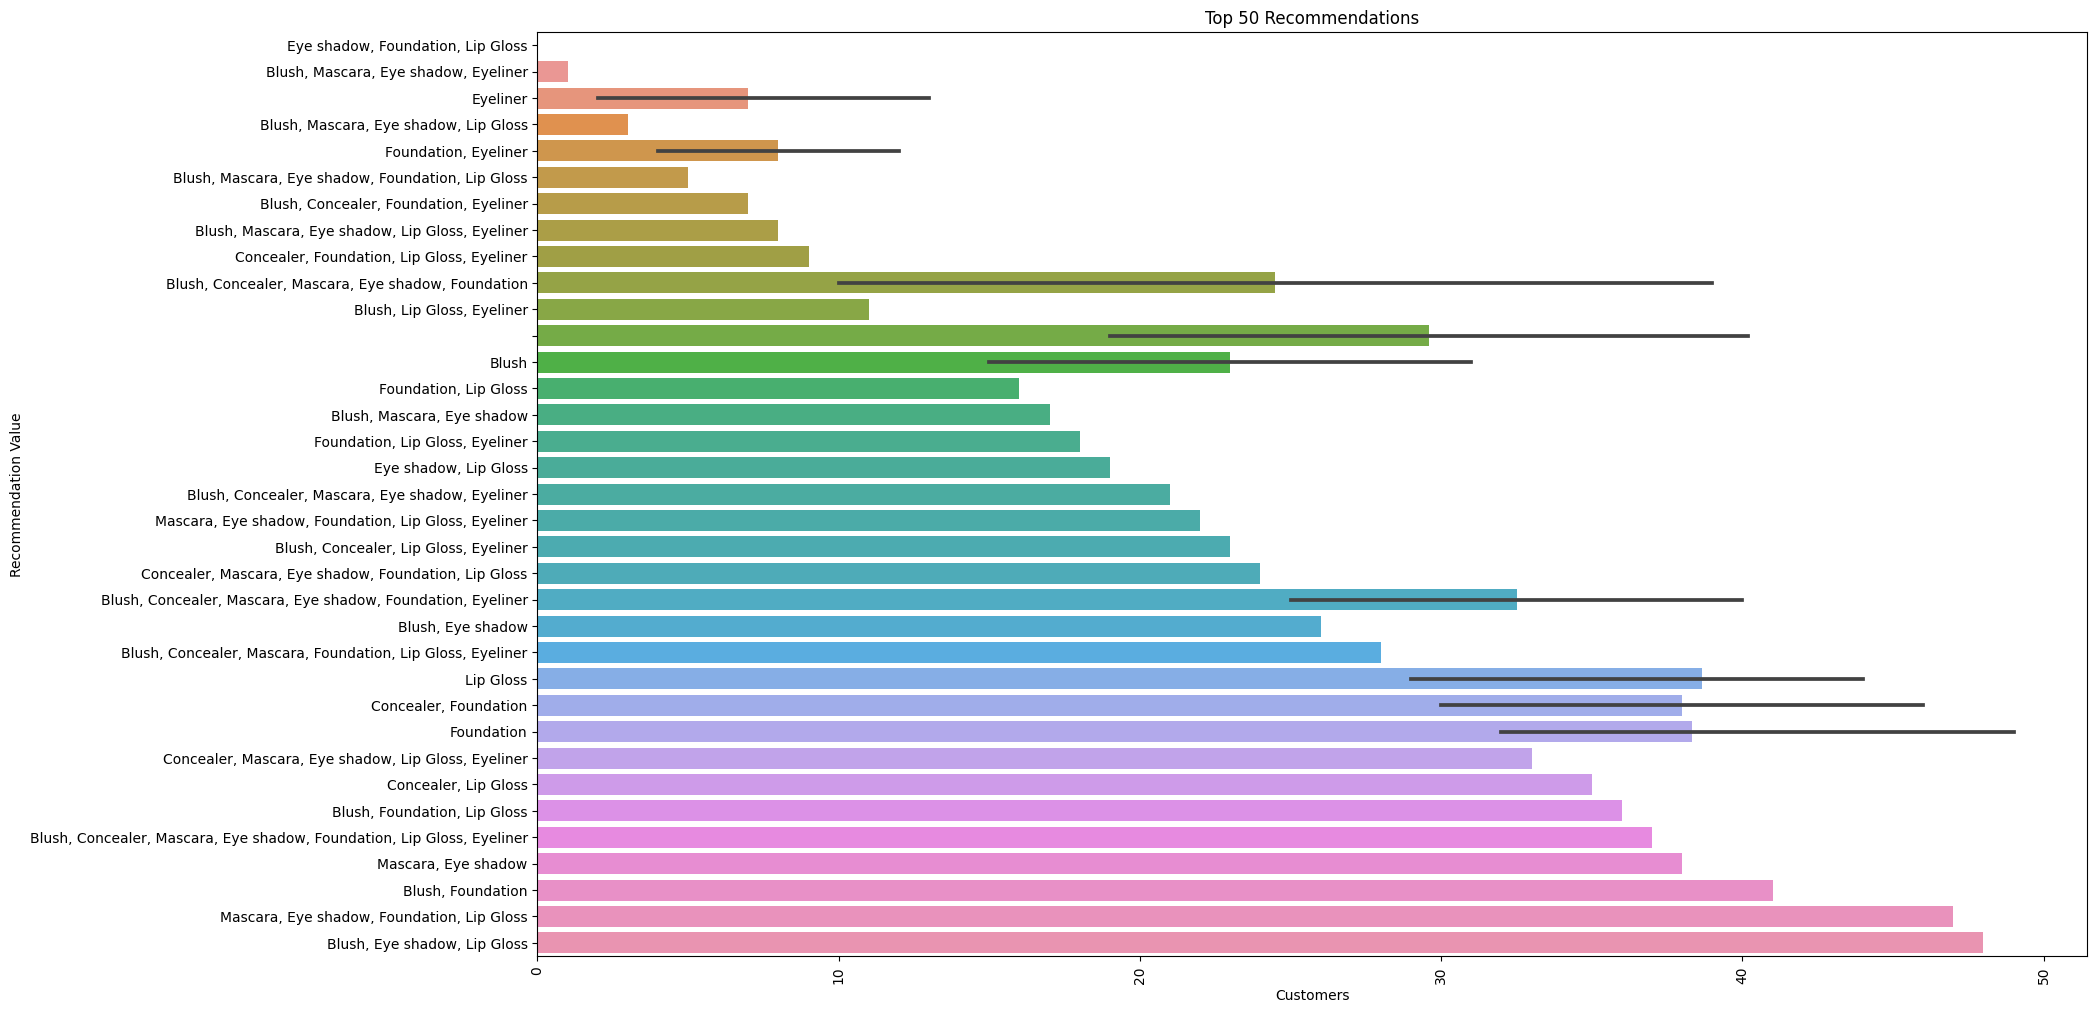

In [14]:
# 'Recommendation'
recommendations_subset = data['Recommendation'][:50]

# Plotting the bar chart
plt.figure(figsize=(20, 12))
sns.barplot(x=recommendations_subset.index, y=recommendations_subset)
plt.title('Top 50 Recommendations')
plt.xlabel('Customers')
plt.ylabel('Recommendation Value')
plt.xticks(rotation=90)
plt.show()

#So it shows all the recomendation for the customers.
we can adjust the thrash to narrow the recommendations
On increasing the thrashhold the recommendation decreases and vica versa. 

The value of the thrshhold varies from 0 to 0.5 as on 0.5 it will not recommend anything and on 0.01 it will recommend everything.

# <center> <font color= green> Here 



###Step 1: Data Preprocessing and Loading  

###Step 2: Define the "Purchasing Needs and Taste" Distance (pnt-D)
Distance (pnt-D) = 1 - (Number of common bought products / Number of unique bought products)
This heuristic captures the idea that customers who have bought similar products have closer purchasing needs and taste.

###Step 3: Calculate the similarity between products for Each  Customers
We are calculating a cosine similarity matrix 

###Step 4: Heuristic Reasoning and Getting recommendations for a given customer
Based on the calculated pnt-D values and similarities we calclute total weighted ratings, by which we can apply heuristic reasoning to make predictions for each customer on what they haven't bought yet but may want to buy next.


###Step 5: Evaluate and Refine the Recommendation System
Based on the total weighted scores we are recommeding the products to the customres for thier next purchase.